目的
========

* OpenCVを使って~~顔認識~~顔検出をする
    * ~~顔認識~~顔検出できたら、顔を中心に画像を　600x315px　〜 1200x630px (40:21)に切取る
    * ~~顔認識~~顔検出できなかった画像は、物体認識する
    * ~~物体認識~~物体検出できたら、物体を中心に画像を　600x315px　〜 1200x630px (40:21)に切取る
    * ~~認識~~検出できなかったら中心で切取る

インストールとお試し実行
-------------

http://www.pyimagesearch.com/2015/06/15/install-opencv-3-0-and-python-2-7-on-osx/

### anyenv(pyenv) + pyenv-virtualenv を使用してインストール


```
$ pyenv virtualenv 2.7.9 cv
$ # ~/development/git/github.com/Itseez に opencv と opencv_contrib をclone
$ # それぞれ git checkout 3.1.0 
$ cd ${opencv_dir}
$ cmake -D CMAKE_BUILD_TYPE=RELEASE -D CMAKE_INSTALL_PREFIX=/usr/local \
	-D PYTHON2_PACKAGES_PATH=~/.anyenv/envs/pyenv/versions/cv/lib/python2.7/site-packages \
	-D PYTHON2_LIBRARY=~/.anyenv/envs/pyenv/versions/cv/bin \
	-D PYTHON2_INCLUDE_DIR=~/.anyenv/envs/pyenv/versions/cv/include/python2.7 \
	-D INSTALL_C_EXAMPLES=OFF -D INSTALL_PYTHON_EXAMPLES=ON \
	-D BUILD_EXAMPLES=ON \
	-D OPENCV_EXTRA_MODULES_PATH=~/development/git/github.com/Itseez/opencv_contrib/modules ..

```


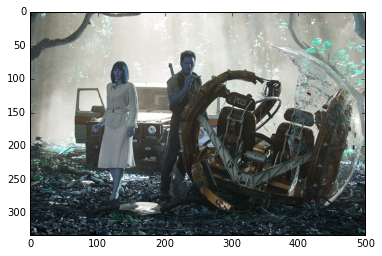

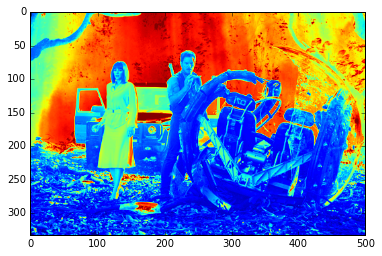

keypoints: 762, descriptors: (762, 61)


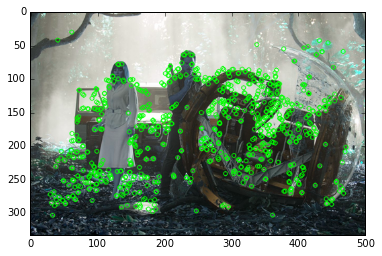

In [30]:
#http://www.pyimagesearch.com/2015/06/15/install-opencv-3-0-and-python-2-7-on-osx/
# import the necessary packages
%matplotlib inline
from __future__ import print_function
import cv2
import matplotlib.pyplot as plt
 
# load the image and convert it to grayscale
image = cv2.imread("jurassic_world.jpg" )

plt.imshow(image)
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("Original", image)

plt.imshow(gray)
plt.show()

# initialize the AKAZE descriptor, then detect keypoints and extract
# local invariant descriptors from the image
detector = cv2.AKAZE_create()
(kps, descs) = detector.detectAndCompute(gray, None)
print("keypoints: {}, descriptors: {}".format(len(kps), descs.shape))
 
## draw the keypoints and show the output image
cv2.drawKeypoints(image, kps, image, (0, 255, 0))
#cv2.imshow("Output", image)

plt.imshow(image)
plt.show()

#cv2.waitKey(0)



### 顔認識をする

facerecog: [[215 191 187 187]]
認識結果
(x,y)=(215,191)  高さ：187  幅：187中点：308,284


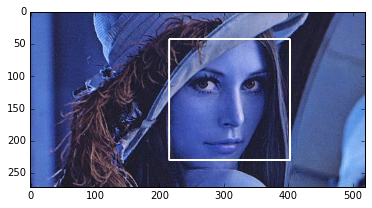

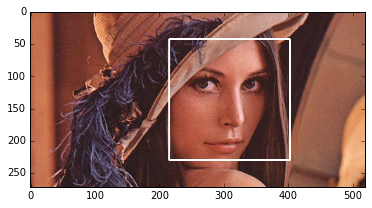

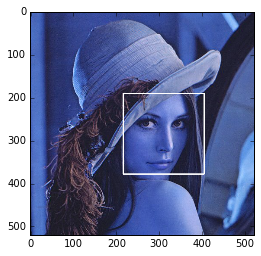

In [3]:
%matplotlib inline
from __future__ import print_function
import cv2
import matplotlib.pyplot as plt

cv2.CV_LOAD_IMAGE_COLOR = 1

# 認識対象ファイルの指定
image_path = "lena.jpg"
# 認識対象ファイルの読み込み
image = cv2.imread(image_path)
#plt.imshow(image)
#plt.show()

#cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(cv_rgb)
#plt.show()

# グレースケールに変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.imshow(image_gray)
#plt.show()

# 顔認識用特徴量のファイル指定
cascade_path = "haarcascades/haarcascade_frontalface_alt.xml"
# カスケード分類器の特徴量を取得する
cascade = cv2.CascadeClassifier(cascade_path)
# 顔認識の実行
facerecog = cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))

#　認識した顔を囲む矩形の色を指定。ここでは白。
color = (255, 255, 255) 

print("facerecog:", facerecog)

# 認識した顔全てを矩形で囲む
for rect in facerecog:
    y_center = rect[0] + rect[2] / 2
    x_center = rect[1] + rect[3] / 2
    height = (image.shape[0]/40)*21

    # 認識結果を表示
    print ("認識結果")
    print ("(x,y)=(" + str(rect[0]) + "," + str(rect[1])+ ")" + \
        "  高さ："+str(rect[2]) + \
        "  幅："+str(rect[3]) + \
          "中点："+str( y_center ) + "," + str( x_center ) )
           
    cv2.rectangle(image, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), color, thickness=2)
    
   
    x_start = 0
    x_end = height

    x_range = [x_center - height/2, x_center + height/2]

    if  x_range[0] > 0 and x_range[1] < image.shape[0]:
        x_start = x_range[0]
        x_end = x_range[1]
    elif x_range[1] > image.shape[0]:
        x_start = image.shape[0] - height
        x_end = image.shape[0]
    else:
        pass
            
    dst = image[x_start:x_end, 0:image.shape[0]]
    plt.imshow(dst)
    plt.show()

    cv_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()


# 認識結果の出力
plt.imshow(image)
plt.show()

#cv2.imwrite("result/Lenna_result.png", image)

    